<a href="https://colab.research.google.com/github/love-sachdeva/imageproccessing/blob/main/da1imageproccessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing packages for python and image proccessing
import cv2
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image
import numpy as np
import pandas as pd
import statistics

Original Image


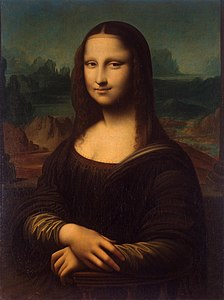

negative transformation


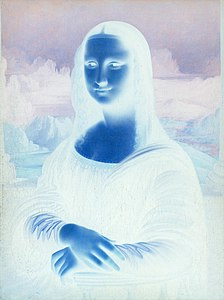

log transformation


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


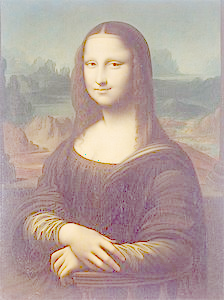

Threshold Transformation on rgb Image


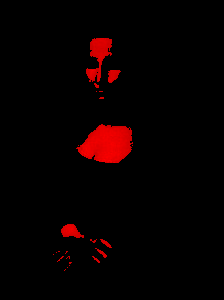

Binary Threshold


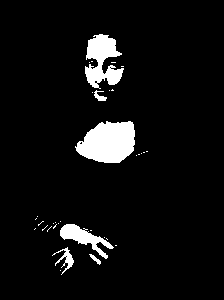

Binary Threshold Inverted


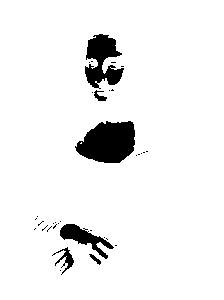

Truncated Threshold


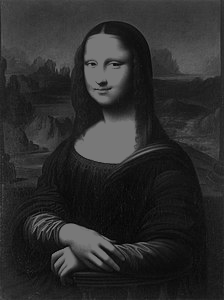

Set to 0


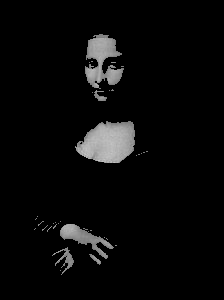

Set to 0 Inverted


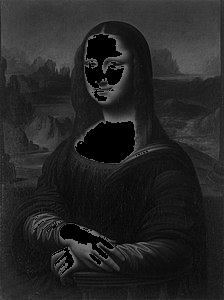

bit splicing


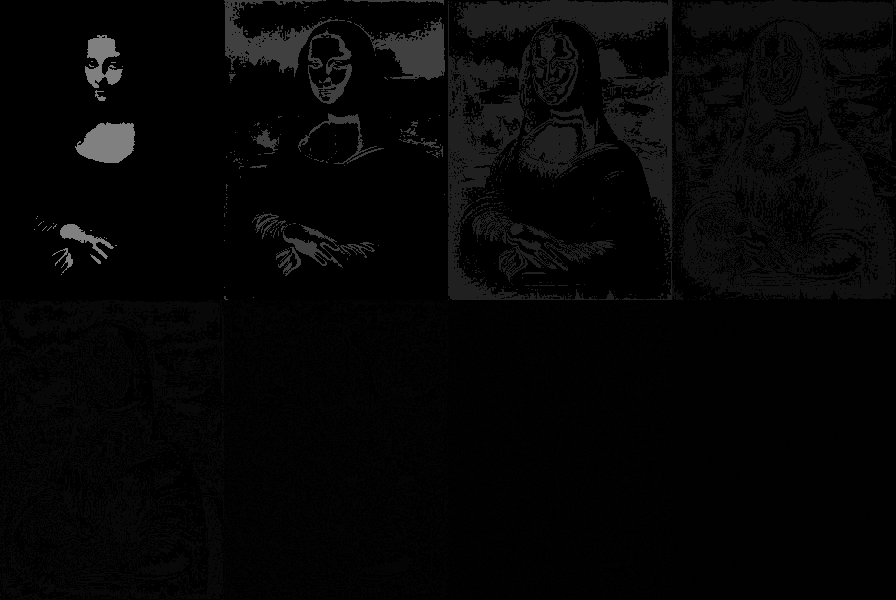

In [ ]:
#Que.2 Point operations

#(a) Image Negatives
img = cv2.imread('Mona_Lisa_rgb.png')
print('Original Image')
cv2_imshow(img)
imgneg = 255-img
print('negative transformation')
cv2_imshow(imgneg)

#(b) Log Transformation
c = 255/ np.log(1 + np.max(img))
imglog = c * np.log(1 + img)
imglog = np.array(imglog, dtype = np.uint8)
print('log transformation')
cv2_imshow(imglog)

#(c) Transformation Fuctions : Threshold Fuction
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
ret,imgthresh = cv2.threshold(img,200,255,cv2.THRESH_TOZERO)
print('Threshold Transformation on rgb Image')
cv2_imshow(imgthresh)
ret, thresh1 = cv2.threshold(img1, 120, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img1, 120, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img1, 120, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img1, 120, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img1, 120, 255, cv2.THRESH_TOZERO_INV)
print('Binary Threshold')
cv2_imshow(thresh1)
print('Binary Threshold Inverted')
cv2_imshow(thresh2)
print('Truncated Threshold')
cv2_imshow(thresh3)
print('Set to 0')
cv2_imshow(thresh4)
print('Set to 0 Inverted')
cv2_imshow(thresh5)

#(d) Transformation Fuctions : Bit plane slicing
imggray=img1
lst = []
for i in range(imggray.shape[0]):
    for j in range(imggray.shape[1]):
         lst.append(np.binary_repr(imggray[i][j] ,width=8)) # width = no. of bits

eight_bit_imggray = (np.array([int(i[0]) for i in lst],dtype = np.uint8) * 128).reshape(imggray.shape[0],imggray.shape[1])
seven_bit_imggray = (np.array([int(i[1]) for i in lst],dtype = np.uint8) * 64).reshape(imggray.shape[0],imggray.shape[1])
six_bit_imggray = (np.array([int(i[2]) for i in lst],dtype = np.uint8) * 32).reshape(imggray.shape[0],imggray.shape[1])
five_bit_imggray = (np.array([int(i[3]) for i in lst],dtype = np.uint8) * 16).reshape(imggray.shape[0],imggray.shape[1])
four_bit_imggray = (np.array([int(i[4]) for i in lst],dtype = np.uint8) * 8).reshape(imggray.shape[0],imggray.shape[1])
three_bit_imggray = (np.array([int(i[5]) for i in lst],dtype = np.uint8) * 4).reshape(imggray.shape[0],imggray.shape[1])
two_bit_imggray = (np.array([int(i[6]) for i in lst],dtype = np.uint8) * 2).reshape(imggray.shape[0],imggray.shape[1])
one_bit_imggray = (np.array([int(i[7]) for i in lst],dtype = np.uint8) * 1).reshape(imggray.shape[0],imggray.shape[1])

finalr = cv2.hconcat([eight_bit_imggray,seven_bit_imggray,six_bit_imggray,five_bit_imggray])
finalv =cv2.hconcat([four_bit_imggray,three_bit_imggray,two_bit_imggray,one_bit_imggray])

final = cv2.vconcat([finalr,finalv])
print('bit splicing')
cv2_imshow(final)

Original image


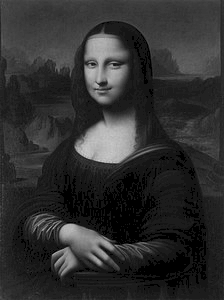

After applying maximum neighbour


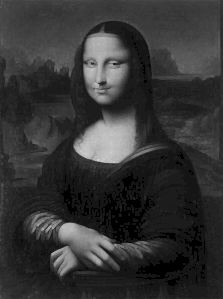

After applying median neighbour


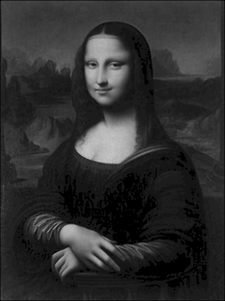

In [ ]:
#Que.3 Neighbourhood operations

#(a) Using Maximum Neighbour
imggray1 = cv2.imread('Mona_Lisa_rgb.png',cv2.IMREAD_GRAYSCALE)
print('Original image')
cv2_imshow(imggray1)
imggray2 = imggray1
imggray1 = cv2.copyMakeBorder(imggray1,1,1,1,1, cv2.BORDER_CONSTANT, None, value = 0)
n = 2
imgn1 = []
for i in range(1,imggray2.shape[0]):
  temp = []
  for j in range(1,imggray2.shape[1]):
    temp.append(np.max([imggray1[i][j],imggray1[i][j+1],imggray1[i+1][j],imggray1[i+1][j+1]]))
  imgn1.append(temp)
imgn1 = np.array(imgn1,dtype = np.uint8)
print('After applying maximum neighbour')
cv2_imshow(imgn1)

#(b) Using Median Neighbour
imggray2 = imggray1
imggray1 = cv2.copyMakeBorder(imggray1,1,1,1,1, cv2.BORDER_CONSTANT, None, value = 0)
n = 2
imgn1 = []
for i in range(1,imggray2.shape[0]):
  temp = []
  for j in range(1,imggray2.shape[1]):
    temp.append(np.median([imggray1[i][j],imggray1[i][j+1],imggray1[i+1][j],imggray1[i+1][j+1]]))
  imgn1.append(temp)
imgn1 = np.array(imgn1,dtype = np.uint8)
print('After applying median neighbour')
cv2_imshow(imgn1)

Original image


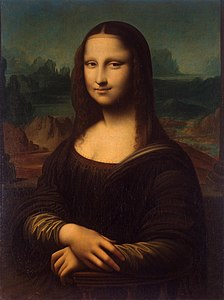

Negative Image


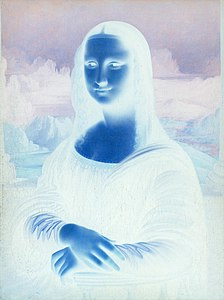

Threshold Image


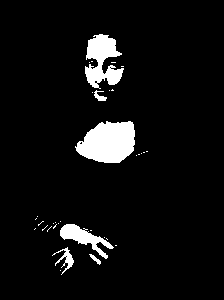

After substraction of original rgb image and Negative Image


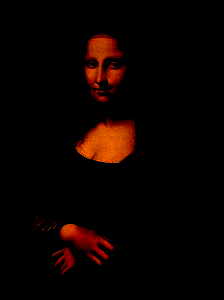

After multiplication of original rgb image and Negative Image


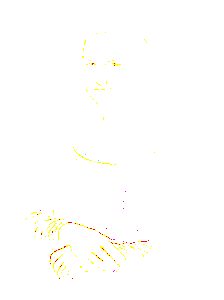

After Bitwise And of original image and threshold binary image


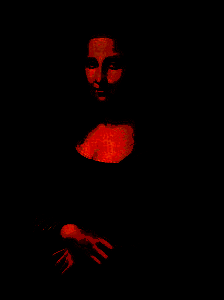

After Bitwise OR of original image and threshold binary image


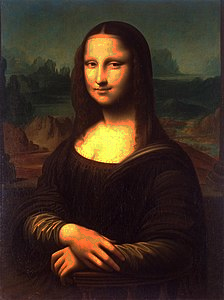

After zooming original rgb


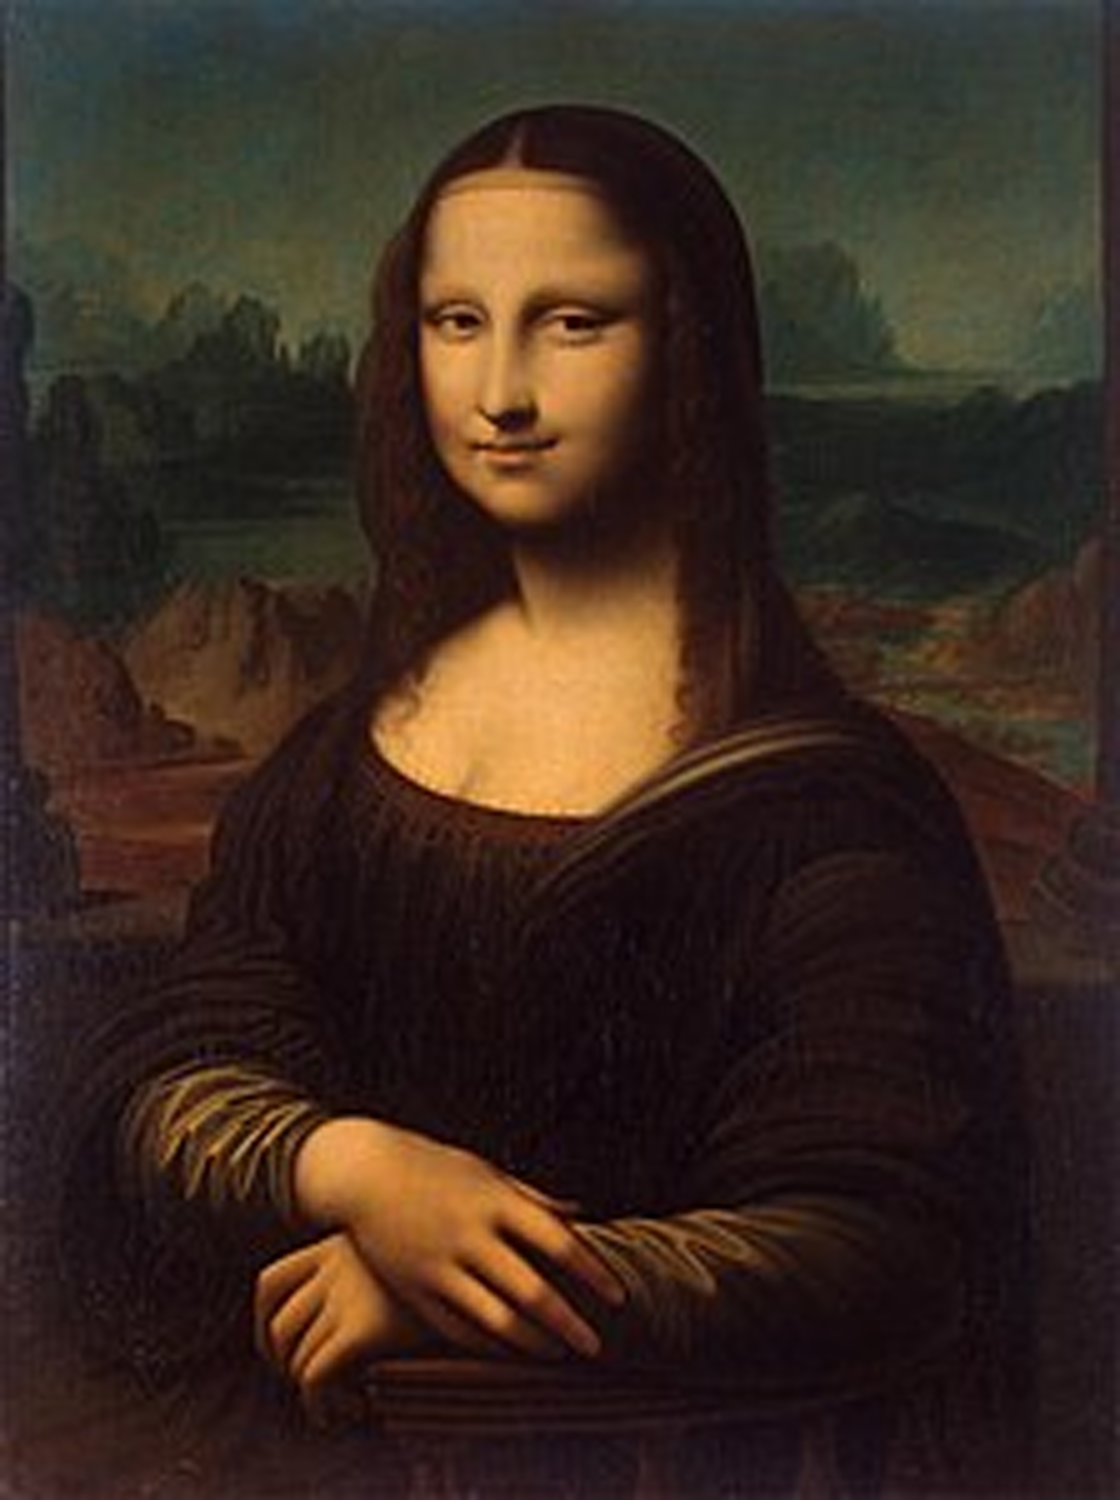

After translation to M


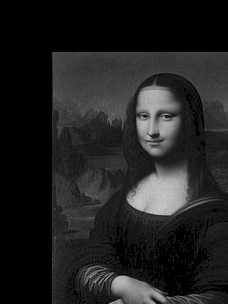

Standard deviation of image of every channel i.e rgb is [[19.5862274 ]
 [34.79707335]
 [45.84291719]]
Upsampled image


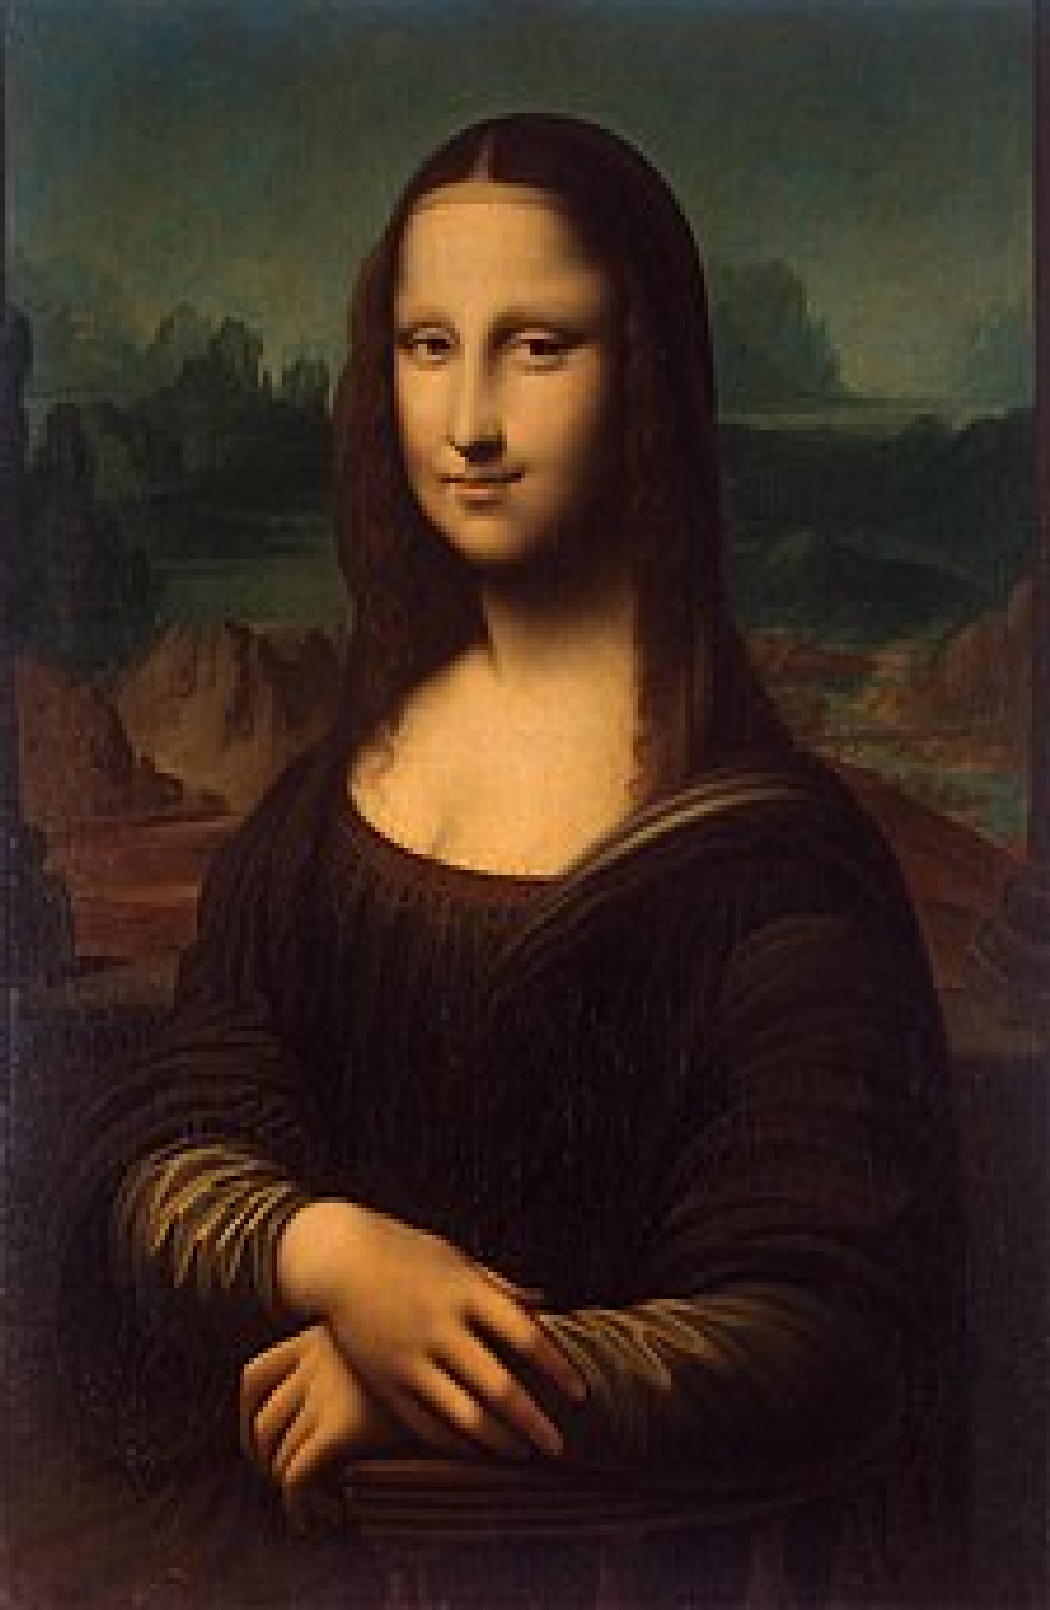

In [ ]:
#Que.4 Operations on set of images

#we took the similar  images that we worked on in previously
img1 = img
print('Original image')
cv2_imshow(img1)
img2 = imgneg
print('Negative Image')
cv2_imshow(img2) 
img3 = thresh1
print('Threshold Image')
cv2_imshow(img3)


#(a.1) Arithematic Operations :- Susbstraction
img3 = cv2.subtract(img1,img2)
print('After substraction of original rgb image and Negative Image')
cv2_imshow(img3)

#(a.2) Arithematic Operations :- Multiplication
img4 = cv2.multiply(img1,img2)
print('After multiplication of original rgb image and Negative Image')
cv2_imshow(img4)

#(b.1) Logical Operations on Binary Image :- And
img5 = cv2.bitwise_and(img1,img3)
print('After Bitwise And of original image and threshold binary image') 
cv2_imshow(img5)

#(b.2) Logical Operations on Binary Image :- OR
img6 = cv2.bitwise_or(img1,img3)
print('After Bitwise OR of original image and threshold binary image')  
cv2_imshow(img6)

#(c.1) Geomertrical Operations :- Zomming
print('After zooming original rgb')
cv2_imshow(cv2.resize(img,None,fx=5,fy=5,interpolation = cv2.INTER_CUBIC))

#(c.2) Geomertrical Operations :- Translation
rows,cols = imggray1.shape
M = np.float32([[1,0,50],[0,1,50]])
dst = cv2.warpAffine(imggray1,M,(cols,rows))
print('After translation to M')
cv2_imshow(dst)

#(d.1) Statistical Operations :- Standard Deviation
mean, std = cv2.meanStdDev(img, mask=None)
print('Standard deviation of image of every channel i.e rgb is',std_1)

#(e.1) Image Interpolation :- Up Sampling
bigger = cv2.resize(img, (1050, 1610),interpolation=cv2.INTER_NEAREST)
print('Upsampled image')
cv2_imshow(bigger)

In [93]:
imggray=img1
p=[20,65]
neighbourp=[[0,0,0],[0,0,0]]
for i in range(imggray.shape[0]):
      for j in range(imggray.shape[1]):
            if i==p[0] and j==p[1]:
              neigbourp.append(p[i+1][j])
print(neigbourp)
        

AttributeError: ignored